## Q3. Bayesian Inference

### Data Overview

The dataset is derived from standard rated chess games played on [lichess.org](https://database.lichess.org).  
Each data point represents:

- **Input $x$**: ELO difference, calculated as White's ELO rating minus Black's ELO.
- **Output $y$**: Win probability for the White player, sampled from a probabilistic model built using Lichess's game database.

These data points will be used to illustrate Bayesian linear regression.

Now, let's load 21 example data points for this demonstration. You don’t need to modify anything—just run the next two code blocks.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The x and y dimensions in this dataset

x = np.array([[-139.15341508, -681.19390135,  374.83381147,  461.45761931,
       -205.65507596,    7.52847535, -551.03494308,  659.15105943,
       -215.83519299, -341.60486674,  590.2827852 ,  648.04672811,
        393.6312089 ,  190.73955575,  388.96338453, -252.161518  ,
       -251.64298135, -657.19690255, -352.94565567, -178.58059633,
        304.90248582]])
y = np.array([[0.44610327, 0.1444    , 0.7737475 , 0.81391054, 0.24666655,
       0.49943957, 0.12402231, 0.93239468, 0.28009304, 0.14202444,
       0.88360894, 0.84497416, 0.72092098, 0.6790719 , 0.84907639,
       0.24405219, 0.27233288, 0.13289914, 0.25335661, 0.34657246,
       0.78085279]])

# The data source: Database of standard rated games, played on lichess.org
# https://database.lichess.org/standard/lichess_db_standard_rated_2013-03.pgn.zst
# x in the above data are ELO differences for White ELO - Black ELO
# y is the win probability sampled from a probabilistic model from Liches DB


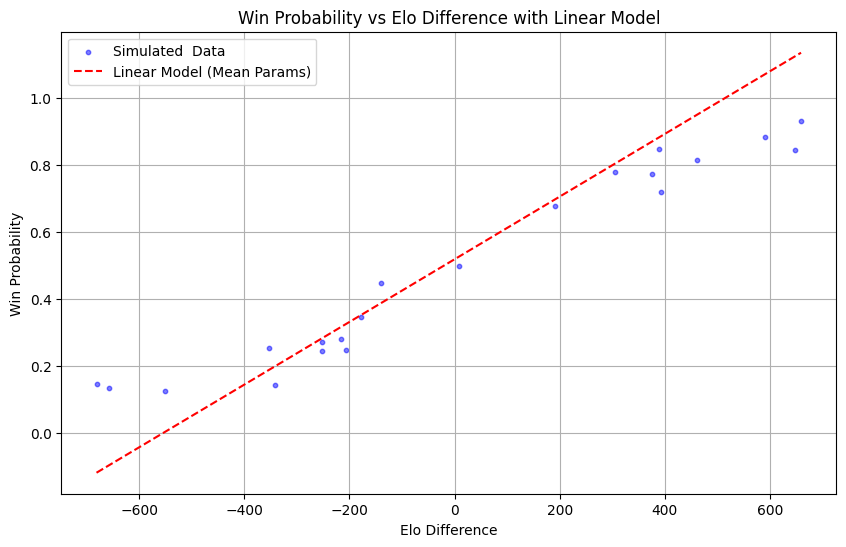

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Mean values of the parameters from the MCMC samples
linear_beta_mean = 0.00093696      # w                          
linear_intercept_mean = 0.51848817 # b                     

# Generate Elo differences over a range for plotting the sigmoid curve
elo_diff_range = np.linspace(x.min(), x.max(), 100)

x_true_plot = elo_diff_range
y_true_plot = linear_beta_mean * elo_diff_range + linear_intercept_mean

# Plot the synthetic data as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, s=10, color="blue", label="Simulated  Data")

# Plot the "true" sigmoid model as a red, dashed line
plt.plot(x_true_plot, y_true_plot, color="red", linestyle="--", label="Linear Model (Mean Params)")

# Labels and legend
plt.xlabel("Elo Difference")
plt.ylabel("Win Probability")
plt.title("Win Probability vs Elo Difference with Linear Model")
plt.legend()
plt.grid(True)
plt.show()


Qa. Find prior hyperparameters (prior_mean and prior_covariance);

In [3]:
# TODO 2:

# Prior hyperparameters
sigma_w_squared=1.0
sigma_b_squared=1.0

prior_mean = np.array([[0], 
                       [0]])
prior_covariance = np.array([[sigma_w_squared, 0], 
                             [0, sigma_b_squared]])

Qb. Find $\omega_{MAP}$

In [4]:
# TODO 1: write the function to compute for \omega_{MAP}

# Make both x and y 1D arrays
X = x.flatten().reshape(-1, 1)
Y = y.flatten().reshape(-1, 1)

# Add a column of ones to x for the intercept term
X = np.hstack((X, np.ones((X.shape[0], 1))))  # Now in the shape of (n_samples, 2)
# Now, the columns of X correspond to w and b respectively

# Compute X^T X (LHS)
A = np.dot(X.T, X)

# Compute X^T y (RH)
B = np.dot(X.T, Y)

# Solve for omega_MAP: (X^T X + Lambda)^{-1} X^T y
w = np.dot(np.linalg.inv(A + prior_covariance), B)  # Shape (2, 1)

# Output the result
print(w)

[[0.00067235]
 [0.46732143]]


Qc. Find posterior hyperparameters (posterior_mean and posterior_covariance);

In [5]:
import numpy as np

# TODO 3:
# Compute posterior parameters
posterior_covariance = np.linalg.inv(X.T @ X + np.linalg.inv(prior_covariance))
print([(posterior_covariance[0][0])])

posterior_mean = posterior_covariance @ (X.T @ Y + np.linalg.inv(prior_covariance) @ prior_mean)
print(posterior_mean[0])

# Sample from the posterior distribution
num_samples = 100
samples = np.random.multivariate_normal(posterior_mean.flatten(), posterior_covariance, size=num_samples)

[2.704047454291664e-07]
[0.00067235]


Qd. Based on all the fitted lines of Bayesian linear regression: (1) Plot all the samples of slopes. (2) Choose the most reasonable slope that fits the data linearly. Please report the slopefind one fitted line that best represent the relationship between $x$ and $y$

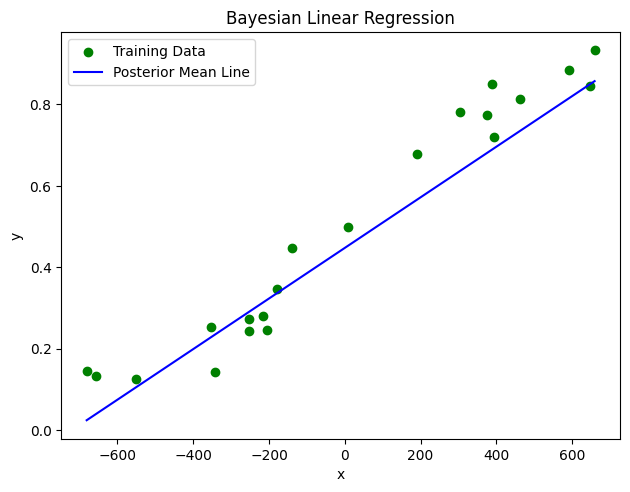

In [7]:
import matplotlib.pyplot as plt

# TODO 4: Find the mode result of all the samples and plot it
best_slope, best_intercept = samples.mean(axis=0)

x_vals = np.linspace(X.min(), X.max(), 100)
y_vals = best_slope * x_vals + best_intercept
plt.scatter(X[:, 0], Y, color='green', label='Training Data')
plt.plot(x_vals, y_vals, color='blue', label='Posterior Mean Line')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.legend(loc="best")
plt.title('Bayesian Linear Regression')
plt.show()

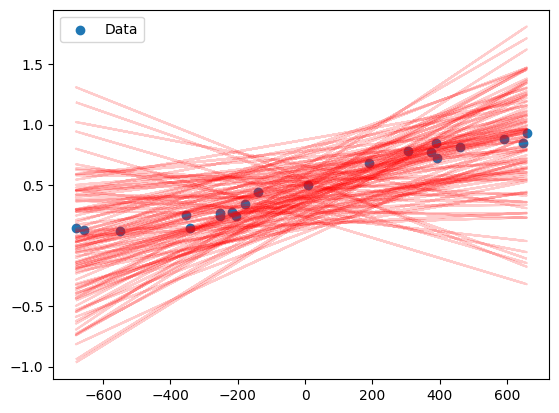

In [10]:
plt.scatter(X[:, 0], Y, label="Data")
for w, b in samples: 
    plt.plot(X[:, 0], w * X[:, 0] + b, alpha=0.2, color="red")
plt.legend()
plt.show()